In [12]:
from fynesse import access, assess, address

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
models = ['resnet50', 'retinanet', 'unet', 'vitb16']

# this is a total of 15 events
events = ['instructions',
'cache-misses',
'cache-references',
'L1-dcache-load-misses',
'L1-dcache-loads',
'L1-dcache-stores',
'LLC-load-misses',
'LLC-loads',
'LLC-store-misses',
'LLC-stores',
'fp_arith_inst_retired.128b_packed_single',
'fp_arith_inst_retired.256b_packed_single',
'fp_arith_inst_retired.512b_packed_single',
'fp_arith_inst_retired.scalar_double',
'fp_arith_inst_retired.scalar_single']

seeds = [0, 42, 137]

In [14]:
model = 'resnet50'
event = 'instructions'
event_hash = address.hash(event)

cycles = list(map(lambda x: int(x), [1e4, 2.5e4, 5e4, 7.5e4, 1e5, 2.5e5, 5e5, 7.5e5, 1e6, 2.5e6, 5e6, 7.5e6, 1e7]))

## Percent Error in Actual Sampling Period

In [15]:
all_errors = []

for cycle in cycles:
    errors = []

    for seed in seeds:
        df = access.load_df(f'./data/csv/sp/{model}_{event_hash}_s{seed}_c{cycle}.csv')
        periods = df.loc[df['event'] == 'cycles', 'period'].values

        error = (periods - cycle) / cycle
        errors.append(error)

    all_errors.append(np.concatenate(errors))

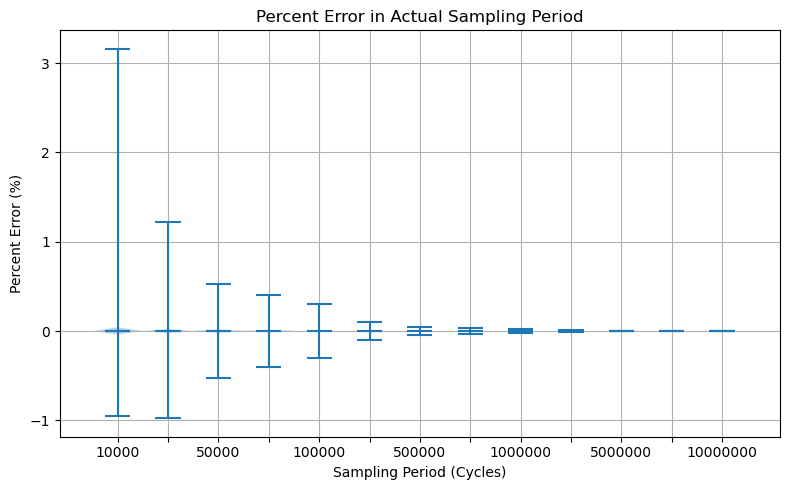

In [16]:
fig, ax = plt.subplots(figsize=(8,5))

ax.violinplot(all_errors, widths=1, showmeans=True)

ax.set_title('Percent Error in Actual Sampling Period')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Percent Error (%)')

ax.grid()

plt.tight_layout()
plt.savefig('./figures/sp/percent_error.png')
plt.show()

## Percentage of Inferences Successfully Profiled

In [17]:
all_ninferences = []

for cycle in cycles:
    ninferences = []

    for seed in seeds:
        df = access.load_df(f'./data/csv/sp/{model}_{event_hash}_s{seed}_c{cycle}.csv')
        ninferences.append(len(assess.extract_inferences(df)))

    all_ninferences.append(ninferences)

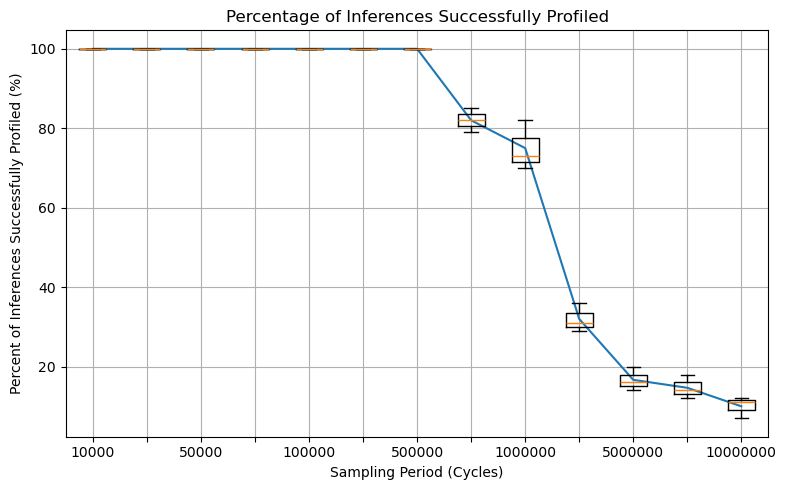

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([i+1 for i in range(len(cycles))], list(map(lambda values: np.mean(values), all_ninferences)))
ax.boxplot(all_ninferences)

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Percent of Inferences Successfully Profiled (%)')

ax.set_title('Percentage of Inferences Successfully Profiled')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.grid()

plt.tight_layout()
plt.savefig('./figures/sp/inferences_profiled.png')
plt.show()

## Total Number of Samples Recorded

In [19]:
all_nsamples = []

for cycle in cycles:
    nsamples = []

    for seed in seeds:
        df = access.load_df(f'./data/csv/sp/{model}_{event_hash}_s{seed}_c{cycle}.csv')
        nsamples.append(len(df.loc[df['event'] == 'instructions']))

    all_nsamples.append(nsamples)

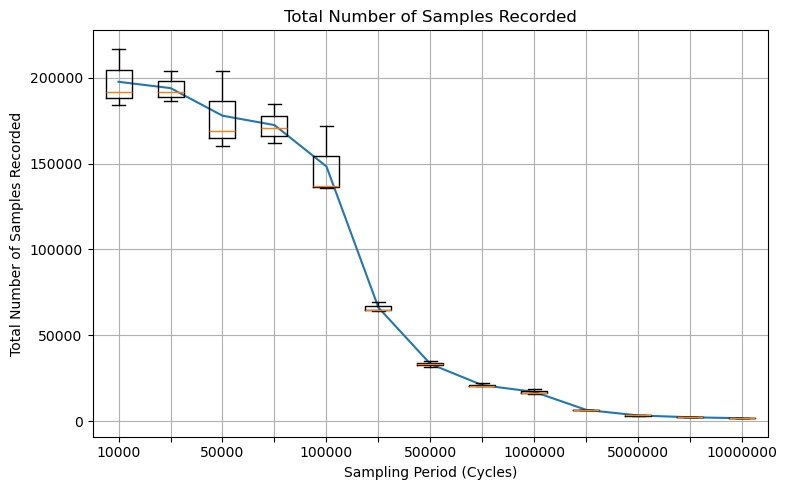

In [20]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([i+1 for i in range(len(cycles))], list(map(lambda values: np.mean(values), all_nsamples)))
ax.boxplot(all_nsamples)

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Total Number of Samples Recorded')

ax.set_title('Total Number of Samples Recorded')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.grid()

plt.tight_layout()
plt.savefig('./figures/sp/samples_recorded.png')
plt.show()

## Aggregated Figure

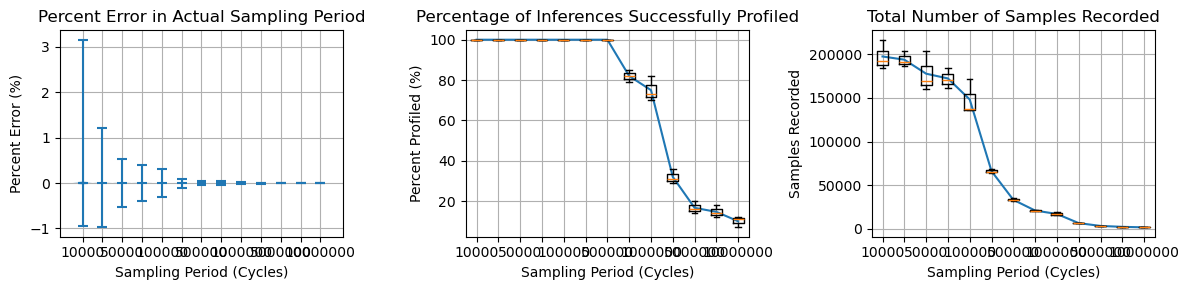

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

# figure (a)
ax = axes[0]
ax.violinplot(all_errors, widths=1, showmeans=True)

ax.set_title('Percent Error in Actual Sampling Period')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Percent Error (%)')

ax.grid()

# figure (b)
ax = axes[1]
ax.plot([i+1 for i in range(len(cycles))], list(map(lambda values: np.mean(values), all_ninferences)))
ax.boxplot(all_ninferences)

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Percent Profiled (%)')

ax.set_title('Percentage of Inferences Successfully Profiled')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.grid()

# figure (c)
ax = axes[2]
ax.plot([i+1 for i in range(len(cycles))], list(map(lambda values: np.mean(values), all_nsamples)))
ax.boxplot(all_nsamples)

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Samples Recorded')

ax.set_title('Total Number of Samples Recorded')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.grid()

# aggregated figure
plt.tight_layout()
plt.savefig('./figures/sp/aggregated_figure.png')
plt.show()